In [1]:
from vasili_helpers import *



In [45]:
xb, xq, gt, metric = load_dataset("sift-128-euclidean")

Loading Dataset = sift-128-euclidean
File already exists at /pub/scratch/vmageirakos/vdb-project-data/data/datasets/sift-128-euclidean.hdf5. Skipping download.


In [17]:
# # Store results: {nthreads: [total_times]}
# timing_results = {}
# train_times = {}
# add_times = {}

# nruns = 30

# for nthreads in [1, 2, 4, 8, 16, 32, 64, 128]:
#     timing_results[nthreads] = []
#     train_times[nthreads] = []
#     add_times[nthreads] = []
#     for nr in range(nruns):
#         faiss.omp_set_num_threads(nthreads)  # Set the number of threads for OpenBLAS
#         os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"
#         os.environ["MKL_NUM_THREADS"] = f"{nthreads}"
        
#         warmup_index, train_time, add_time = train_ivfflat(
#             xb,
#             nlist=100,
#             km_n_iter=10,
#             km_max_pts=256,
#             seed=42,
#             store_dir=None,
#             verbose=False,
#             metric=metric,
#         )
#         total_time = train_time + add_time
#         timing_results[nthreads].append(total_time)
#         train_times[nthreads].append(train_time)
#         add_times[nthreads].append(add_time)
#         print(f"[nthreads={nthreads} | {nlist=} | run={nr+1}] train_time={train_time:.4f}s, add_time={add_time:.4f}s, total_time={total_time:.4f}s")


In [18]:
# # Create boxplot of total times per thread count
# plt.figure(figsize=(10, 6))
# labels = sorted(timing_results.keys())
# data = [timing_results[nt] for nt in labels]

# plt.boxplot(data, labels=labels, showmeans=True)
# plt.xlabel("Number of Threads")
# plt.ylabel("Total Time (s)")
# plt.title("Index Build + Add Time vs. Number of Threads")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.tight_layout()
# plt.show()


# Vary nthreads and nlist
## niter = 10

In [ ]:
# # Parameters
# nruns = 3
# # nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
# nthreads_list = [1, 16, 64]
# nlists = [1, 10, 50, 100, 200, 500, 1000]

# # Store results as: results[nthreads][nlist] = [total_times]
# results = {}

# for nthreads in nthreads_list:
#     faiss.omp_set_num_threads(nthreads)
#     os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"
#     os.environ["MKL_NUM_THREADS"] = f"{nthreads}"
#     results[nthreads] = {}
#     for nlist in nlists:
#         total_times = []
#         for run in range(nruns):
#             _, train_time, add_time = train_ivfflat(
#                 xb,
#                 nlist=nlist,
#                 km_n_iter=10,
#                 km_max_pts=256,
#                 seed=42,
#                 store_dir=None,
#                 verbose=False,
#                 metric=metric,
#             )
#             total_time = train_time + add_time
#             total_times.append(total_time)
#             print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
#         results[nthreads][nlist] = total_times


# import pickle

# with open("ivfflat_benchmark_results_SIFT1M_niter10.pkl", "wb") as f:
#     pickle.dump(results, f)


[threads=1 | nlist=1 | run=1] train=0.0492s, add=0.5736s, total=0.6228s
[threads=1 | nlist=1 | run=2] train=0.0488s, add=0.5727s, total=0.6215s
[threads=1 | nlist=1 | run=3] train=0.0500s, add=0.5673s, total=0.6173s
[threads=1 | nlist=10 | run=1] train=0.0531s, add=0.5052s, total=0.5583s
[threads=1 | nlist=10 | run=2] train=0.0536s, add=0.5255s, total=0.5792s
[threads=1 | nlist=10 | run=3] train=0.0528s, add=0.5209s, total=0.5737s
[threads=1 | nlist=50 | run=1] train=0.0836s, add=0.5455s, total=0.6291s
[threads=1 | nlist=50 | run=2] train=0.0832s, add=0.6166s, total=0.6998s
[threads=1 | nlist=50 | run=3] train=0.0849s, add=0.4049s, total=0.4897s
[threads=1 | nlist=100 | run=1] train=0.1554s, add=0.5814s, total=0.7367s
[threads=1 | nlist=100 | run=2] train=0.1574s, add=0.6061s, total=0.7635s
[threads=1 | nlist=100 | run=3] train=0.1560s, add=0.5626s, total=0.7186s
[threads=1 | nlist=200 | run=1] train=0.4398s, add=0.8815s, total=1.3214s
[threads=1 | nlist=200 | run=2] train=0.4389s, add

In [ ]:
# Parameters
nruns = 3
# nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nthreads_list = [1, 16, 64]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"
    os.environ["MKL_NUM_THREADS"] = f"{nthreads}"
    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        for run in range(nruns):
            index, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=10,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
            results[nthreads][nlist] = total_times      

            ## Add a Search: (to approximately validate AV-Tree table)
            # ts = time.perf_counter()
            # index.nprobe = 20
            # # Di, Ii = index.search(xq[:1], k=100)
            # a,b,c,d = index.search_and_return_centroids(xq[:1], k=100)
            # te = time.perf_counter()
            # search_time = te - ts
            # total_time += search_time
            # total_times.append(total_time)
            # print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, search_time={search_time:.4f}s, total={total_time:.4f}s")
            # results[nthreads][nlist] = total_times

import pickle

with open("ivfflat_benchmark_results_SIFT1M_niter10.pkl", "wb") as f:
    pickle.dump(results, f)




[threads=1 | nlist=1 | run=1] train=0.0537s, add=0.3745s, total=0.4282s
[threads=1 | nlist=1 | run=2] train=0.0500s, add=0.3679s, total=0.4179s
[threads=1 | nlist=1 | run=3] train=0.0496s, add=0.3696s, total=0.4192s
[threads=1 | nlist=10 | run=1] train=0.0543s, add=0.2918s, total=0.3460s
[threads=1 | nlist=10 | run=2] train=0.0543s, add=0.4871s, total=0.5415s
[threads=1 | nlist=10 | run=3] train=0.0546s, add=0.2785s, total=0.3331s
[threads=1 | nlist=50 | run=1] train=0.0847s, add=0.4739s, total=0.5586s
[threads=1 | nlist=50 | run=2] train=0.0847s, add=0.4566s, total=0.5412s
[threads=1 | nlist=50 | run=3] train=0.0841s, add=0.4098s, total=0.4939s
[threads=1 | nlist=100 | run=1] train=0.1575s, add=0.5800s, total=0.7375s
[threads=1 | nlist=100 | run=2] train=0.1626s, add=0.5690s, total=0.7316s
[threads=1 | nlist=100 | run=3] train=0.1570s, add=0.6128s, total=0.7698s
[threads=1 | nlist=200 | run=1] train=0.4260s, add=0.8531s, total=1.2791s
[threads=1 | nlist=200 | run=2] train=0.4252s, add

In [ ]:
# # Plot boxplots: one figure per nthreads, x-axis = nlist
# for nthreads in nthreads_list:
#     plt.figure(figsize=(10, 6))
#     nlist_labels = sorted(results[nthreads].keys())
#     data = [results[nthreads][nlist] for nlist in nlist_labels]

#     plt.boxplot(data, labels=nlist_labels, showmeans=True)
#     plt.xlabel("nlist")
#     plt.ylabel("Total Time (s)")
#     plt.title(f"Total Time vs. nlist (Threads = {nthreads})")
#     plt.grid(True, linestyle="--", alpha=0.6)
#     plt.tight_layout()
#     plt.show()


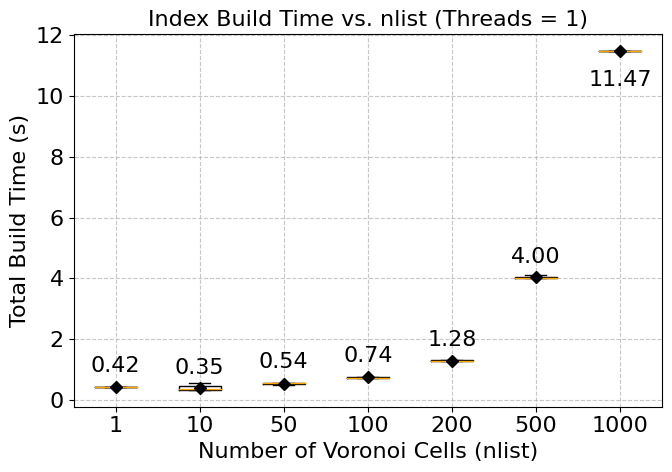

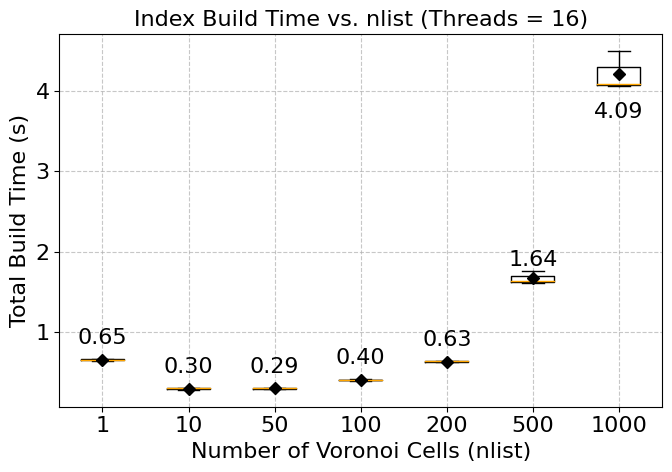

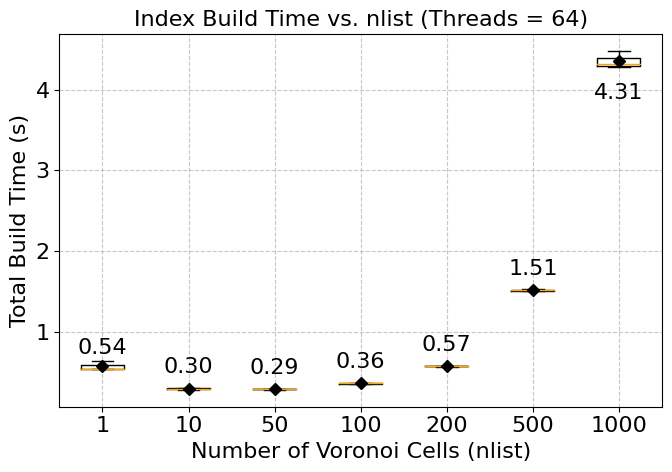

<Figure size 640x480 with 0 Axes>

In [36]:

import matplotlib.pyplot as plt
lnwidth = 1
# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",  # diamond
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 7
fig_height = 5

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))  # controlled figsize
    
    nlist_labels = sorted(results[nthreads].keys())
    data = [results[nthreads][nlist] for nlist in nlist_labels]

    box = plt.boxplot(
        data,
        labels=nlist_labels,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
        boxprops=dict(linewidth=lnwidth),
        whiskerprops=dict(linewidth=lnwidth),
        capprops=dict(linewidth=lnwidth),
        medianprops=dict(linewidth=lnwidth, color="orange"),
    )

    # Add median labels: above all except the last (placed below)
    for i, line in enumerate(box['medians']):
        x, y = line.get_xdata(), line.get_ydata()
        median_y = y[0]
        y_range = plt.ylim()[1] - plt.ylim()[0]

        if i == len(box['medians']) - 1:
            # Place below for the last box
            y_offset = -0.05 * y_range
            va = 'top'
        else:
            # Place above for all others
            y_offset = 0.03 * y_range
            va = 'bottom'

        plt.text(
            x.mean(), median_y + y_offset,
            f"{median_y:.2f}",
            ha='center', va=va,
            fontsize=16,
            color='black'
        )
    plt.xlabel("Number of Voronoi Cells (nlist)")
    plt.ylabel("Total Build Time (s)")
    plt.title(f"Index Build Time vs. nlist (Threads = {nthreads})")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

plt.savefig(f"boxplot_threads{nthreads}_niter10.pdf", format="pdf", dpi=600)

# HERE: 


stacked barplot:

In [52]:
xb, xq, gt, metric = load_dataset("SIFT1M")

Loading Dataset = SIFT1M


In [53]:
# Parameters
nruns = 3
# nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nthreads_list = [1, 16, 64]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"
    os.environ["MKL_NUM_THREADS"] = f"{nthreads}"
    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        results[nthreads][nlist] = {"train": [], "add": [], "total": []}
        for run in range(nruns):

            index, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=10,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
            results[nthreads][nlist]["train"].append(train_time)
            results[nthreads][nlist]["add"].append(add_time)
            results[nthreads][nlist]["total"].append(total_time)


            ## Add a Search: (to approximately validate AV-Tree table)
            # ts = time.perf_counter()
            # index.nprobe = 20
            # # Di, Ii = index.search(xq[:1], k=100)
            # a,b,c,d = index.search_and_return_centroids(xq[:1], k=100)
            # te = time.perf_counter()
            # search_time = te - ts
            # total_time += search_time
            # total_times.append(total_time)
            # print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, search_time={search_time:.4f}s, total={total_time:.4f}s")
            # results[nthreads][nlist] = total_times

import pickle

with open("detailed_ivfflat_benchmark_results_SIFT1M_niter10.pkl", "wb") as f:
    pickle.dump(results, f)




[threads=1 | nlist=1 | run=1] train=0.1470s, add=0.7792s, total=0.9261s
[threads=1 | nlist=1 | run=2] train=0.1311s, add=0.7135s, total=0.8446s
[threads=1 | nlist=1 | run=3] train=0.1332s, add=0.6997s, total=0.8330s
[threads=1 | nlist=10 | run=1] train=0.1341s, add=0.7644s, total=0.8985s
[threads=1 | nlist=10 | run=2] train=0.1398s, add=0.6209s, total=0.7607s
[threads=1 | nlist=10 | run=3] train=0.1104s, add=0.6203s, total=0.7308s
[threads=1 | nlist=50 | run=1] train=0.1764s, add=0.6433s, total=0.8198s
[threads=1 | nlist=50 | run=2] train=0.1699s, add=0.8671s, total=1.0370s
[threads=1 | nlist=50 | run=3] train=0.1719s, add=0.6165s, total=0.7884s
[threads=1 | nlist=100 | run=1] train=0.2689s, add=0.8960s, total=1.1650s
[threads=1 | nlist=100 | run=2] train=0.2256s, add=0.7248s, total=0.9504s
[threads=1 | nlist=100 | run=3] train=0.2191s, add=0.7452s, total=0.9643s
[threads=1 | nlist=200 | run=1] train=0.5268s, add=1.0902s, total=1.6170s
[threads=1 | nlist=200 | run=2] train=0.5273s, add

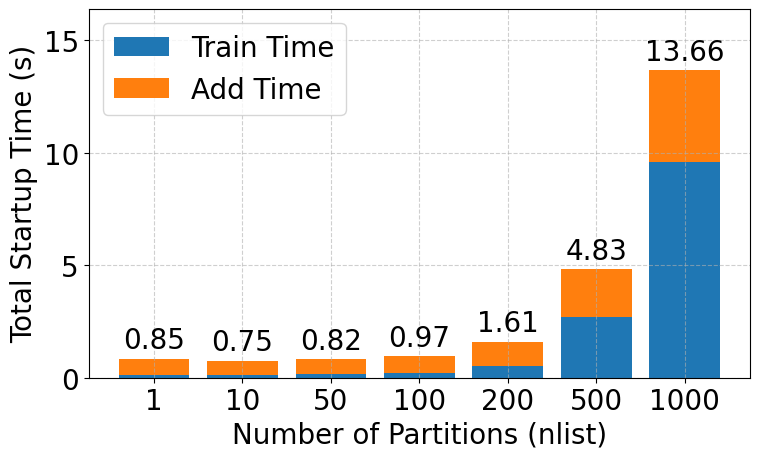

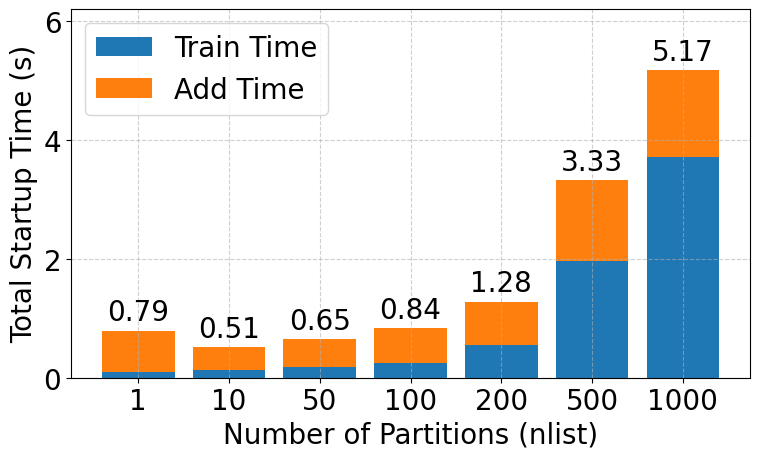

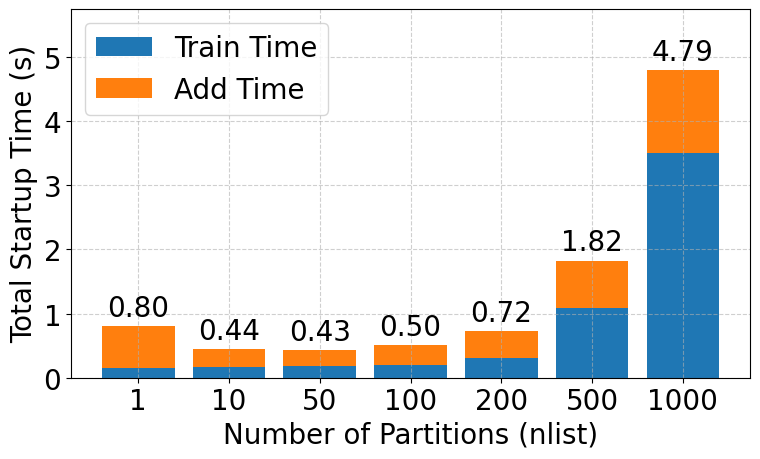

In [26]:
import pickle
nthreads_list = [1, 16, 64]
with open("detailed_ivfflat_benchmark_results_SIFT1M_niter10.pkl", "rb") as f:
    results = pickle.load(f)

import matplotlib.pyplot as plt
lnwidth = 1
# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 20,
    "axes.titlesize": 14,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",  # diamond
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 8
fig_height = 5

import numpy as np

colors = ["#1f77b4", "#ff7f0e"]  # train = blue, add = orange

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))
    
    nlist_labels = sorted(results[nthreads].keys())
    x = np.arange(len(nlist_labels))

    train_medians = [np.median(results[nthreads][nlist]["train"]) for nlist in nlist_labels]
    add_medians = [np.median(results[nthreads][nlist]["add"]) for nlist in nlist_labels]

    plt.bar(x, train_medians, label="Train Time", color=colors[0])
    plt.bar(x, add_medians, bottom=train_medians, label="Add Time", color=colors[1])

    for i in range(len(x)):
        total = train_medians[i] + add_medians[i]
        plt.text(
            x[i], total + 0.02 * max(train_medians),
            f"{total:.2f}", ha="center", va="bottom", fontsize=20
        )
    
        # Add this after bar plot and labels
    ymax = max(np.add(train_medians, add_medians)) * 1.2
    plt.ylim(top=ymax)
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)



    plt.xticks(x, nlist_labels)
    plt.xlabel("Number of Partitions (nlist)")
    plt.ylabel("Total Startup Time (s)")
    # plt.title(f"Startup Time Breakdown (Threads = {nthreads})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"barplot_threads{nthreads}_niter10.pdf", format="pdf", dpi=600)
    plt.show()



larger dataset:

In [56]:
xb, xq, gt, metric = load_dataset("SIFT10M")

Loading Dataset = SIFT10M


In [57]:
# Parameters
nruns = 3
# nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nthreads_list = [1, 16, 64]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"
    os.environ["MKL_NUM_THREADS"] = f"{nthreads}"
    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        results[nthreads][nlist] = {"train": [], "add": [], "total": []}
        for run in range(nruns):

            index, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=10,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
            results[nthreads][nlist]["train"].append(train_time)
            results[nthreads][nlist]["add"].append(add_time)
            results[nthreads][nlist]["total"].append(total_time)


            ## Add a Search: (to approximately validate AV-Tree table)
            # ts = time.perf_counter()
            # index.nprobe = 20
            # # Di, Ii = index.search(xq[:1], k=100)
            # a,b,c,d = index.search_and_return_centroids(xq[:1], k=100)
            # te = time.perf_counter()
            # search_time = te - ts
            # total_time += search_time
            # total_times.append(total_time)
            # print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, search_time={search_time:.4f}s, total={total_time:.4f}s")
            # results[nthreads][nlist] = total_times

import pickle

with open("detailed_ivfflat_benchmark_results_SIFT10M_niter10.pkl", "wb") as f:
    pickle.dump(results, f)




[threads=1 | nlist=1 | run=1] train=1.1368s, add=9.0740s, total=10.2108s
[threads=1 | nlist=1 | run=2] train=1.0605s, add=8.9233s, total=9.9838s
[threads=1 | nlist=1 | run=3] train=1.0512s, add=8.7680s, total=9.8192s
[threads=1 | nlist=10 | run=1] train=1.0622s, add=9.1612s, total=10.2235s
[threads=1 | nlist=10 | run=2] train=1.0513s, add=8.8683s, total=9.9196s
[threads=1 | nlist=10 | run=3] train=1.0430s, add=8.9080s, total=9.9510s
[threads=1 | nlist=50 | run=1] train=1.0726s, add=9.2653s, total=10.3379s
[threads=1 | nlist=50 | run=2] train=1.0762s, add=9.2726s, total=10.3488s
[threads=1 | nlist=50 | run=3] train=1.0735s, add=9.0314s, total=10.1049s
[threads=1 | nlist=100 | run=1] train=1.1629s, add=9.6596s, total=10.8225s
[threads=1 | nlist=100 | run=2] train=1.1777s, add=9.6632s, total=10.8409s
[threads=1 | nlist=100 | run=3] train=1.1519s, add=9.1307s, total=10.2826s
[threads=1 | nlist=200 | run=1] train=1.4379s, add=11.3795s, total=12.8174s
[threads=1 | nlist=200 | run=2] train=1.

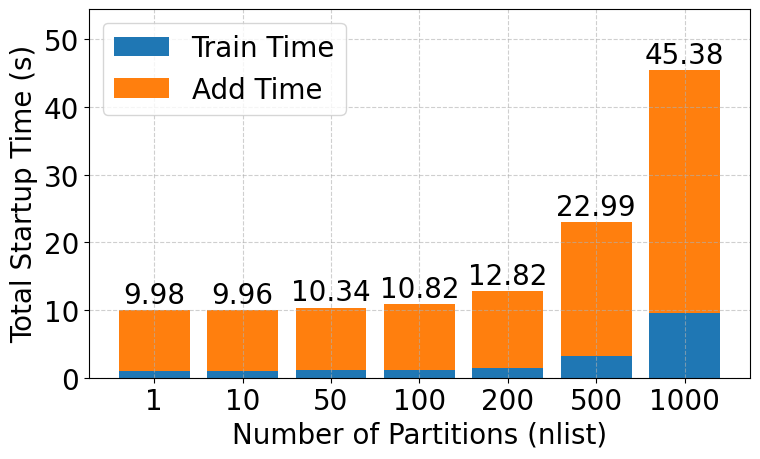

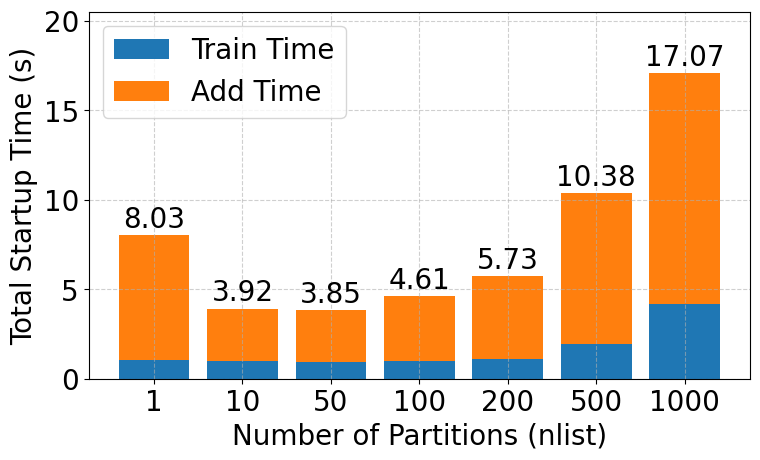

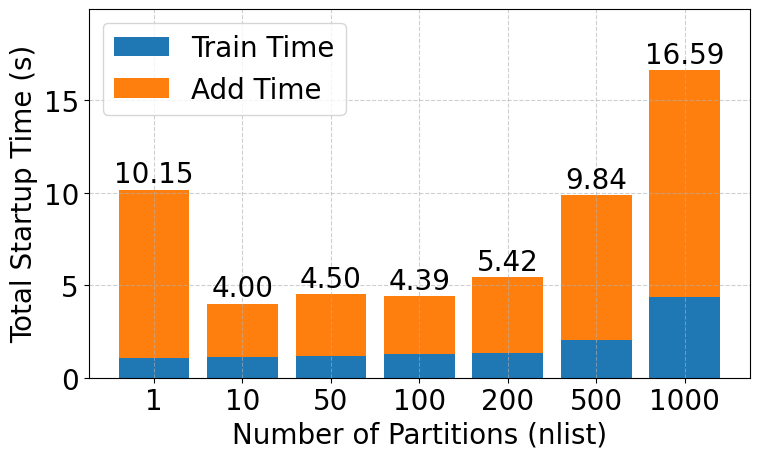

In [25]:

with open("detailed_ivfflat_benchmark_results_SIFT10M_niter10.pkl", "rb") as f:
    results = pickle.load(f)

import matplotlib.pyplot as plt
lnwidth = 1
# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 20,
    "axes.titlesize": 14,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",  # diamond
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 8
fig_height = 5

import numpy as np

colors = ["#1f77b4", "#ff7f0e"]  # train = blue, add = orange

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))
    
    nlist_labels = sorted(results[nthreads].keys())
    x = np.arange(len(nlist_labels))

    train_medians = [np.median(results[nthreads][nlist]["train"]) for nlist in nlist_labels]
    add_medians = [np.median(results[nthreads][nlist]["add"]) for nlist in nlist_labels]

    plt.bar(x, train_medians, label="Train Time", color=colors[0])
    plt.bar(x, add_medians, bottom=train_medians, label="Add Time", color=colors[1])

    for i in range(len(x)):
        total = train_medians[i] + add_medians[i]
        plt.text(
            x[i], total + 0.02 * max(train_medians),
            f"{total:.2f}", ha="center", va="bottom", fontsize=20
        )
    
        # Add this after bar plot and labels
    ymax = max(np.add(train_medians, add_medians)) * 1.2
    plt.ylim(top=ymax)
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)



    plt.xticks(x, nlist_labels)
    plt.xlabel("Number of Partitions (nlist)")
    plt.ylabel("Total Startup Time (s)")
    # plt.title(f"Startup Time Breakdown (Threads = {nthreads})")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"barplot_threads{nthreads}_niter10_sift10m.pdf", format="pdf", dpi=600)
    plt.show()



boxplot:

In [39]:
# Parameters
nruns = 3
# nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nthreads_list = [1, 16, 64]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"
    os.environ["MKL_NUM_THREADS"] = f"{nthreads}"
    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        for run in range(nruns):
            index, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=10,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
            results[nthreads][nlist] = total_times      

            ## Add a Search: (to approximately validate AV-Tree table)
            # ts = time.perf_counter()
            # index.nprobe = 20
            # # Di, Ii = index.search(xq[:1], k=100)
            # a,b,c,d = index.search_and_return_centroids(xq[:1], k=100)
            # te = time.perf_counter()
            # search_time = te - ts
            # total_time += search_time
            # total_times.append(total_time)
            # print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, search_time={search_time:.4f}s, total={total_time:.4f}s")
            # results[nthreads][nlist] = total_times

import pickle

with open("ivfflat_benchmark_results_SIFT1M_niter10.pkl", "wb") as f:
    pickle.dump(results, f)


[threads=1 | nlist=1 | run=1] train=1.0754s, add=8.4764s, total=9.5518s
[threads=1 | nlist=1 | run=2] train=1.0769s, add=8.5221s, total=9.5990s
[threads=1 | nlist=1 | run=3] train=1.0696s, add=8.4887s, total=9.5583s
[threads=1 | nlist=10 | run=1] train=1.0571s, add=8.8101s, total=9.8672s
[threads=1 | nlist=10 | run=2] train=1.0554s, add=8.4262s, total=9.4816s
[threads=1 | nlist=10 | run=3] train=1.0567s, add=8.5034s, total=9.5601s
[threads=1 | nlist=50 | run=1] train=1.0848s, add=8.9322s, total=10.0170s
[threads=1 | nlist=50 | run=2] train=1.0843s, add=9.0886s, total=10.1730s
[threads=1 | nlist=50 | run=3] train=1.0908s, add=8.8256s, total=9.9164s
[threads=1 | nlist=100 | run=1] train=1.1533s, add=9.6266s, total=10.7799s
[threads=1 | nlist=100 | run=2] train=1.1714s, add=9.5195s, total=10.6909s
[threads=1 | nlist=100 | run=3] train=1.1450s, add=9.0752s, total=10.2202s
[threads=1 | nlist=200 | run=1] train=1.4451s, add=11.7982s, total=13.2433s
[threads=1 | nlist=200 | run=2] train=1.440

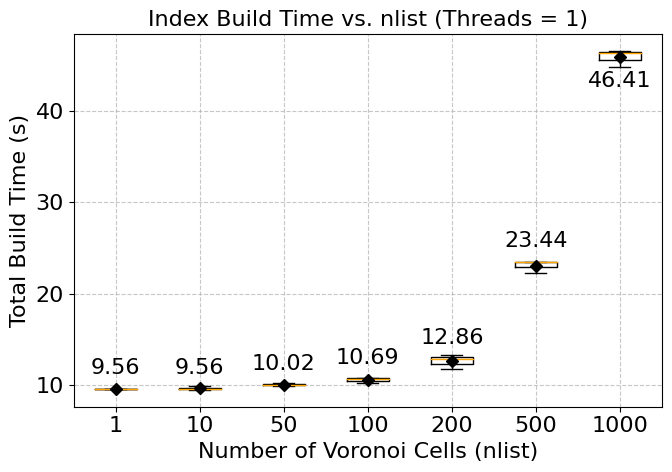

<Figure size 640x480 with 0 Axes>

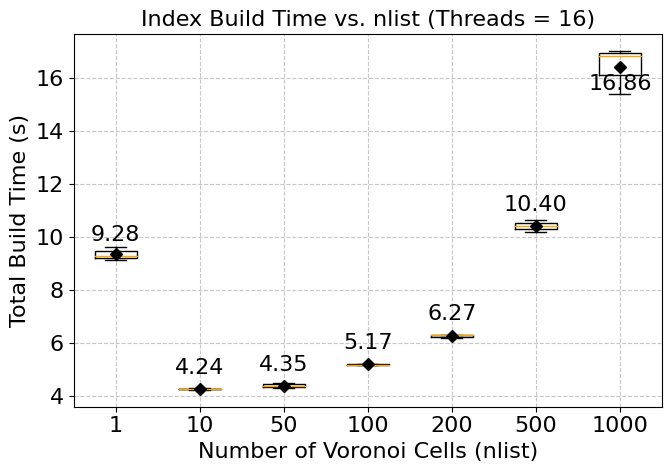

<Figure size 640x480 with 0 Axes>

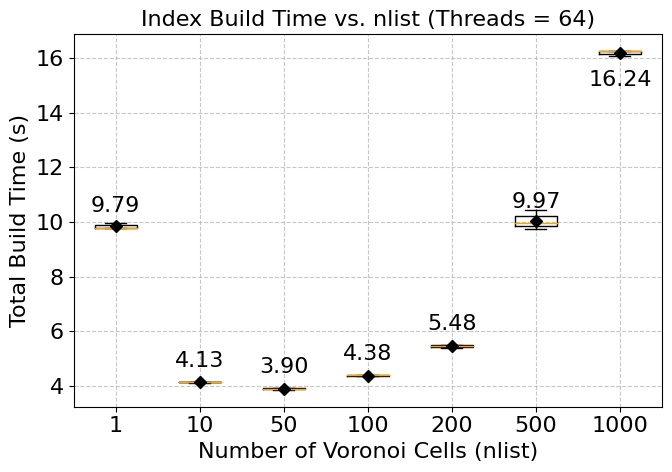

<Figure size 640x480 with 0 Axes>

In [41]:

import matplotlib.pyplot as plt
lnwidth = 1
# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",  # diamond
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 7
fig_height = 5

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))  # controlled figsize
    
    nlist_labels = sorted(results[nthreads].keys())
    data = [results[nthreads][nlist] for nlist in nlist_labels]

    box = plt.boxplot(
        data,
        labels=nlist_labels,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
        boxprops=dict(linewidth=lnwidth),
        whiskerprops=dict(linewidth=lnwidth),
        capprops=dict(linewidth=lnwidth),
        medianprops=dict(linewidth=lnwidth, color="orange"),
    )

    # Add median labels: above all except the last (placed below)
    for i, line in enumerate(box['medians']):
        x, y = line.get_xdata(), line.get_ydata()
        median_y = y[0]
        y_range = plt.ylim()[1] - plt.ylim()[0]

        if i == len(box['medians']) - 1:
            # Place below for the last box
            y_offset = -0.05 * y_range
            va = 'top'
        else:
            # Place above for all others
            y_offset = 0.03 * y_range
            va = 'bottom'

        plt.text(
            x.mean(), median_y + y_offset,
            f"{median_y:.2f}",
            ha='center', va=va,
            fontsize=16,
            color='black'
        )
    plt.xlabel("Number of Voronoi Cells (nlist)")
    plt.ylabel("Total Build Time (s)")
    plt.title(f"Index Build Time vs. nlist (Threads = {nthreads})")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.savefig(f"boxplot_threads{nthreads}_sift10m_niter10.pdf", format="pdf", dpi=600)

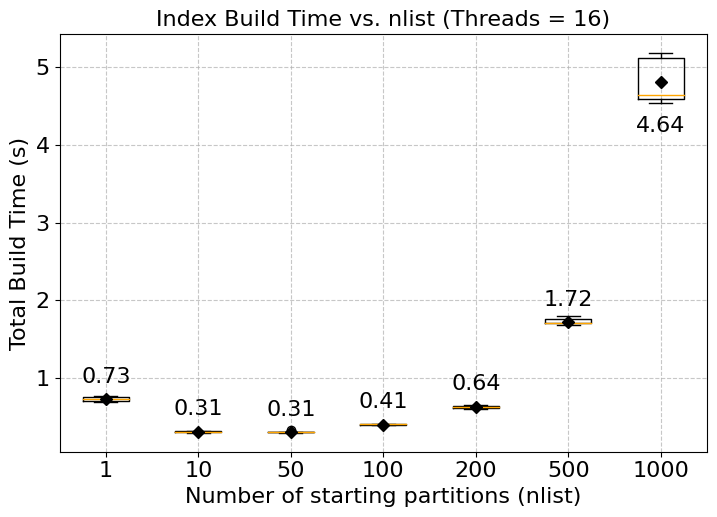

In [ ]:
import matplotlib.pyplot as plt
lnwidth = 1

# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 1,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 7
fig_height = 5

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))

    nlist_labels = sorted(results[nthreads].keys())
    data = [results[nthreads][nlist] for nlist in nlist_labels]

    box = plt.boxplot(
        data,
        labels=nlist_labels,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
        boxprops=dict(linewidth=lnwidth),
        whiskerprops=dict(linewidth=lnwidth),
        capprops=dict(linewidth=lnwidth),
        medianprops=dict(linewidth=lnwidth, color="orange"),
    )
    # Add median labels: above all except the last (placed below)
    for i, line in enumerate(box['medians']):
        x, y = line.get_xdata(), line.get_ydata()
        median_y = y[0]
        y_range = plt.ylim()[1] - plt.ylim()[0]

        if i == len(box['medians']) - 1:
            # Place below for the last box
            y_offset = -0.05 * y_range
            va = 'top'
        else:
            # Place above for all others
            y_offset = 0.03 * y_range
            va = 'bottom'

        plt.text(
            x.mean(), median_y + y_offset,
            f"{median_y:.2f}",
            ha='center', va=va,
            fontsize=16,
            color='black'
        )

    plt.xlabel("Number of starting partitions (nlist)")
    plt.ylabel("Total Build Time (s)")
    plt.title(f"Index Build Time vs. nlist (Threads = {nthreads})")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"boxplot_threads{nthreads}.pdf", format="pdf", dpi=600)
    plt.show()


# NITER = 1

In [94]:
# Parameters
nruns = 10
nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        for run in range(nruns):
            _, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=1,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
        results[nthreads][nlist] = total_times


[threads=1 | nlist=1 | run=1] train=0.0492s, add=0.5420s, total=0.5912s
[threads=1 | nlist=1 | run=2] train=0.0497s, add=0.5332s, total=0.5830s
[threads=1 | nlist=1 | run=3] train=0.0488s, add=0.5394s, total=0.5882s
[threads=1 | nlist=1 | run=4] train=0.0487s, add=0.5291s, total=0.5778s
[threads=1 | nlist=1 | run=5] train=0.0487s, add=0.5352s, total=0.5839s
[threads=1 | nlist=1 | run=6] train=0.0487s, add=0.5302s, total=0.5789s
[threads=1 | nlist=1 | run=7] train=0.0488s, add=0.5337s, total=0.5825s
[threads=1 | nlist=1 | run=8] train=0.0487s, add=0.5297s, total=0.5784s
[threads=1 | nlist=1 | run=9] train=0.0487s, add=0.5349s, total=0.5836s
[threads=1 | nlist=1 | run=10] train=0.0487s, add=0.5312s, total=0.5798s
[threads=1 | nlist=10 | run=1] train=0.0493s, add=0.4972s, total=0.5465s
[threads=1 | nlist=10 | run=2] train=0.0493s, add=0.6342s, total=0.6835s
[threads=1 | nlist=10 | run=3] train=0.0496s, add=0.5756s, total=0.6252s
[threads=1 | nlist=10 | run=4] train=0.0499s, add=0.5951s, t

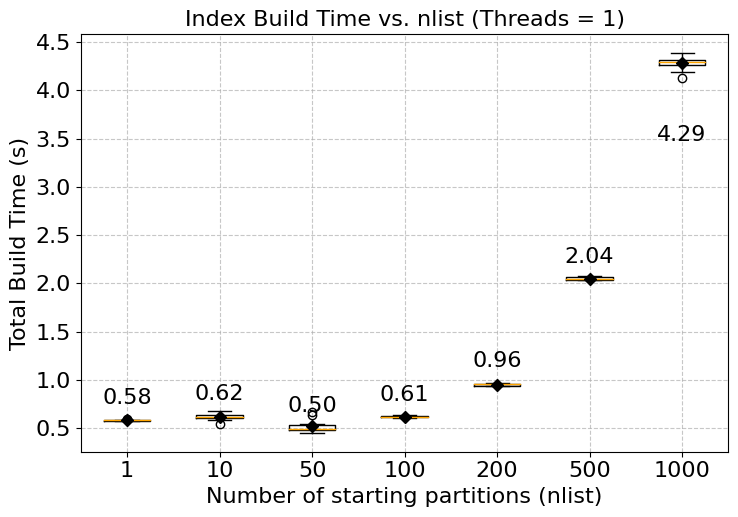

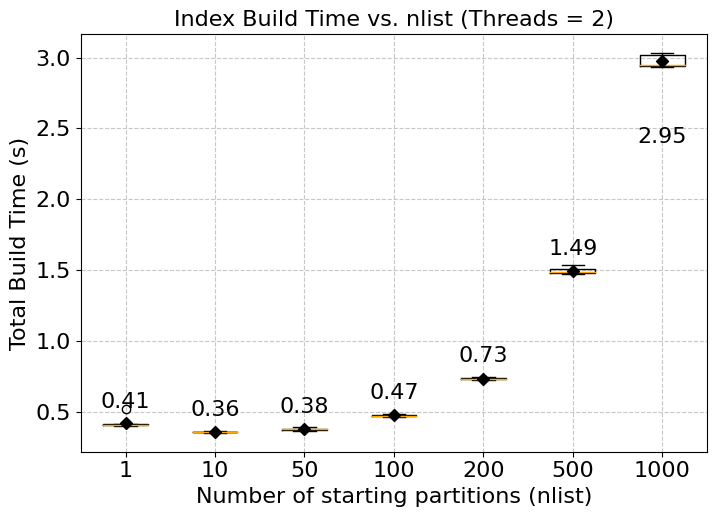

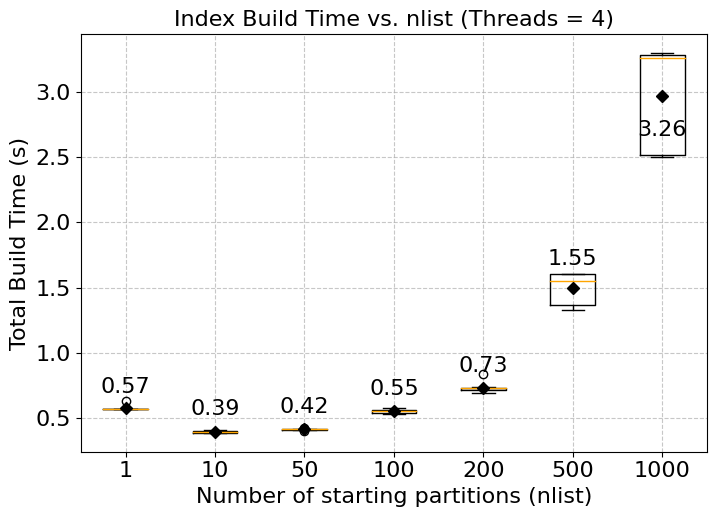

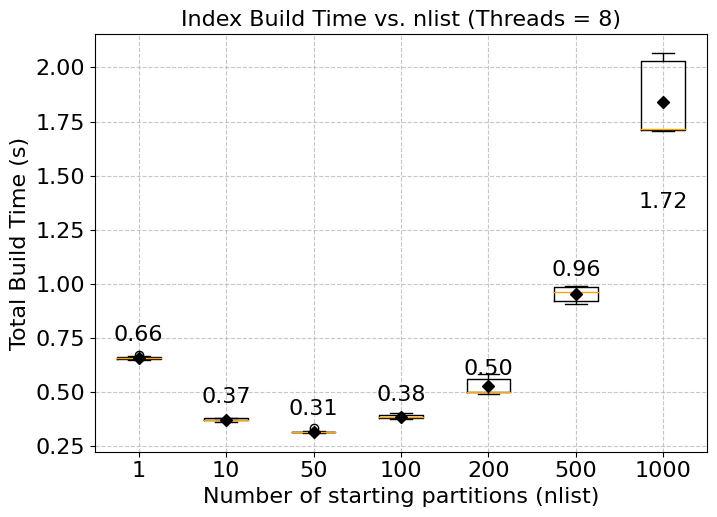

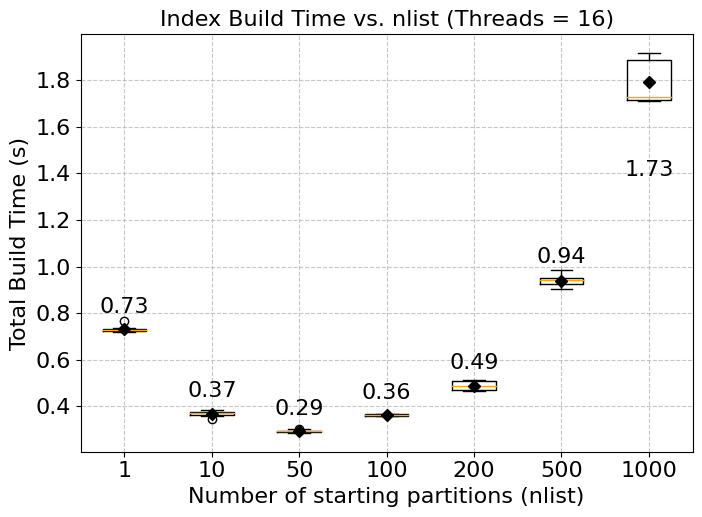

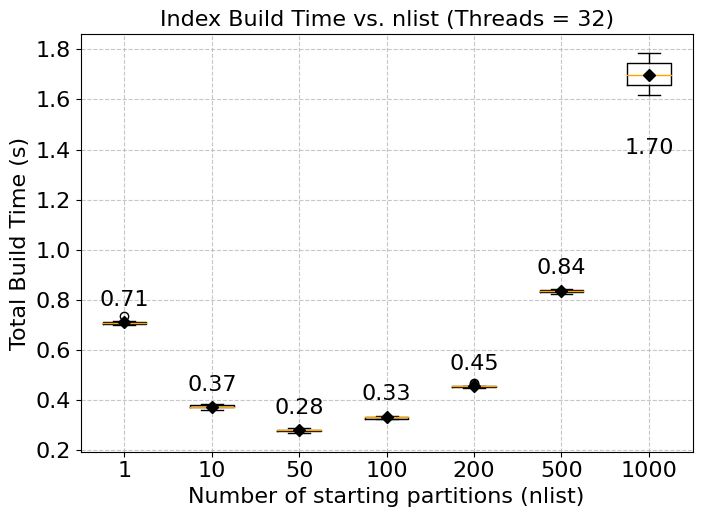

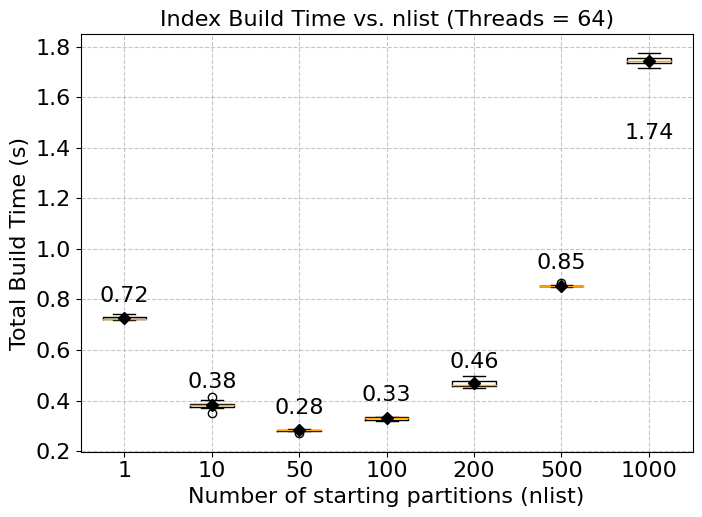

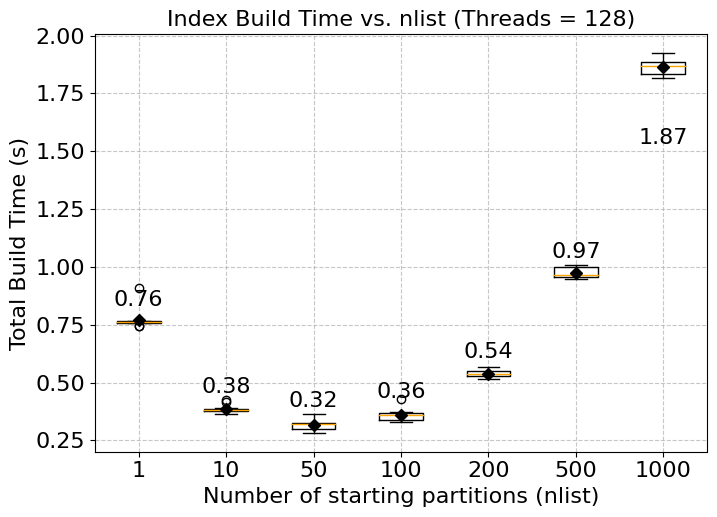

In [95]:
import matplotlib.pyplot as plt
lnwidth = 1

# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 1,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 7
fig_height = 5

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))

    nlist_labels = sorted(results[nthreads].keys())
    data = [results[nthreads][nlist] for nlist in nlist_labels]

    box = plt.boxplot(
        data,
        labels=nlist_labels,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
        boxprops=dict(linewidth=lnwidth),
        whiskerprops=dict(linewidth=lnwidth),
        capprops=dict(linewidth=lnwidth),
        medianprops=dict(linewidth=lnwidth, color="orange"),
    )
    # Add median labels: above all except the last (placed below)
    for i, line in enumerate(box['medians']):
        x, y = line.get_xdata(), line.get_ydata()
        median_y = y[0]
        y_range = plt.ylim()[1] - plt.ylim()[0]

        if i == len(box['medians']) - 1:
            # Place below for the last box
            y_offset = -0.15 * y_range
            va = 'top'
        else:
            # Place above for all others
            y_offset = 0.03 * y_range
            va = 'bottom'

        plt.text(
            x.mean(), median_y + y_offset,
            f"{median_y:.2f}",
            ha='center', va=va,
            fontsize=16,
            color='black'
        )

    plt.xlabel("Number of starting partitions (nlist)")
    plt.ylabel("Total Build Time (s)")
    plt.title(f"Index Build Time vs. nlist (Threads = {nthreads})")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"boxplot_threads{nthreads}_niter-1.pdf", format="pdf", dpi=600)
    plt.show()


# niter = 0 

In [ ]:
import os

# Set the number of threads for OpenBLAS
os.environ["OPENBLAS_NUM_THREADS"] = "1"  # Change "1" to however many threads you want

# Now you can import numpy or other libraries that use OpenBLAS
import numpy as np

# Your computation code here


In [ ]:
# Parameters
nruns = 10
nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    # Set the number of threads for OpenBLAS
    os.environ["OPENBLAS_NUM_THREADS"] = f"{nthreads}"  # Change "1" to however many threads you want

    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        for run in range(nruns):
            _, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=0,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
        results[nthreads][nlist] = total_times


[threads=1 | nlist=1 | run=1] train=0.0496s, add=0.5614s, total=0.6111s
[threads=1 | nlist=1 | run=2] train=0.0507s, add=0.5379s, total=0.5887s
[threads=1 | nlist=1 | run=3] train=0.0499s, add=0.5384s, total=0.5883s
[threads=1 | nlist=1 | run=4] train=0.0501s, add=0.5359s, total=0.5859s
[threads=1 | nlist=1 | run=5] train=0.0497s, add=0.5401s, total=0.5898s
[threads=1 | nlist=1 | run=6] train=0.0498s, add=0.5461s, total=0.5959s
[threads=1 | nlist=1 | run=7] train=0.0495s, add=0.5396s, total=0.5891s
[threads=1 | nlist=1 | run=8] train=0.0501s, add=0.5337s, total=0.5838s
[threads=1 | nlist=1 | run=9] train=0.0498s, add=0.5389s, total=0.5887s
[threads=1 | nlist=1 | run=10] train=0.0501s, add=0.5361s, total=0.5862s
[threads=1 | nlist=10 | run=1] train=0.0501s, add=0.5911s, total=0.6411s
[threads=1 | nlist=10 | run=2] train=0.0496s, add=0.6596s, total=0.7092s
[threads=1 | nlist=10 | run=3] train=0.0501s, add=0.6538s, total=0.7039s
[threads=1 | nlist=10 | run=4] train=0.0503s, add=0.6544s, t

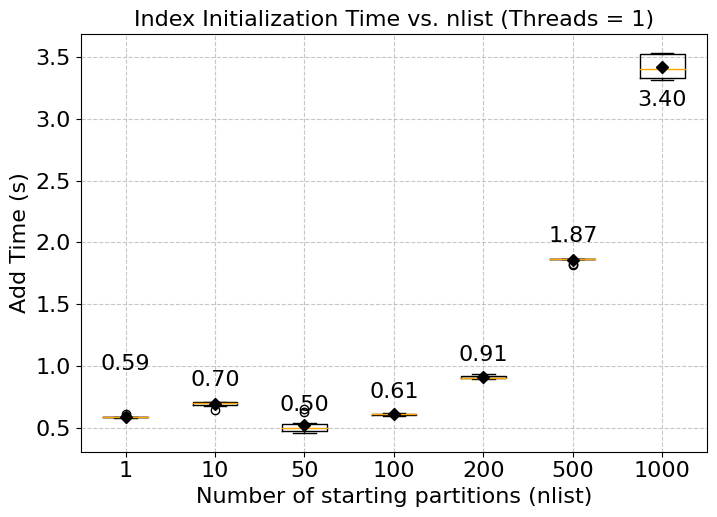

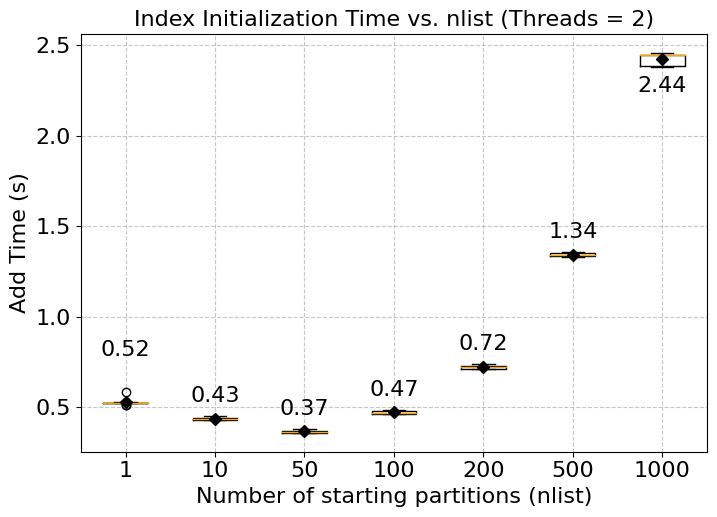

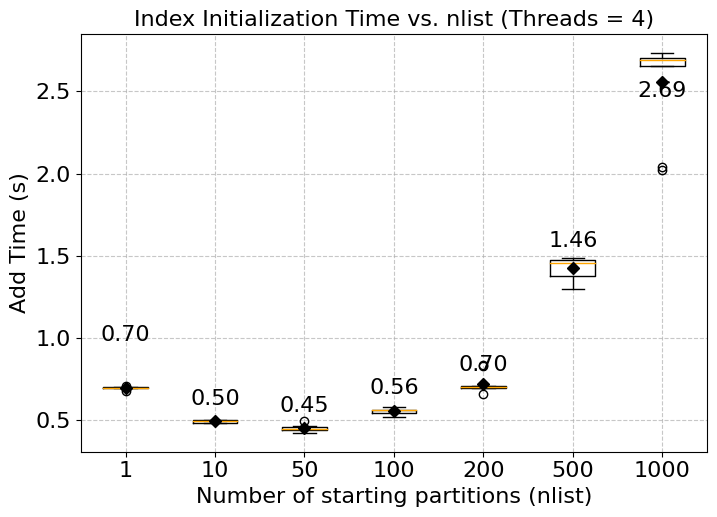

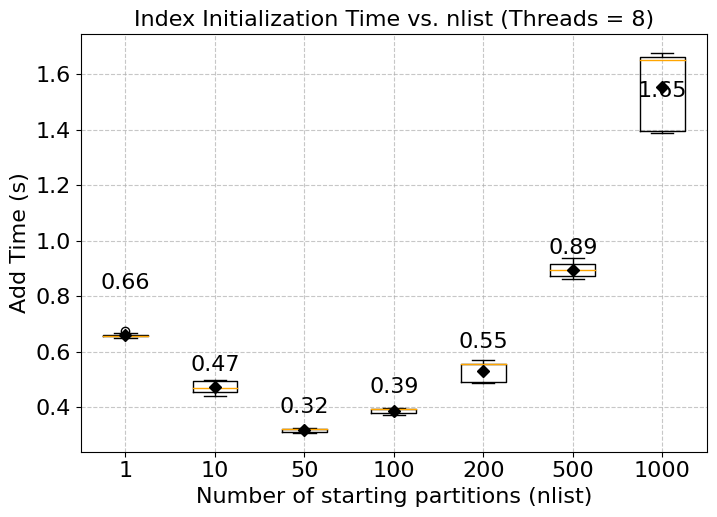

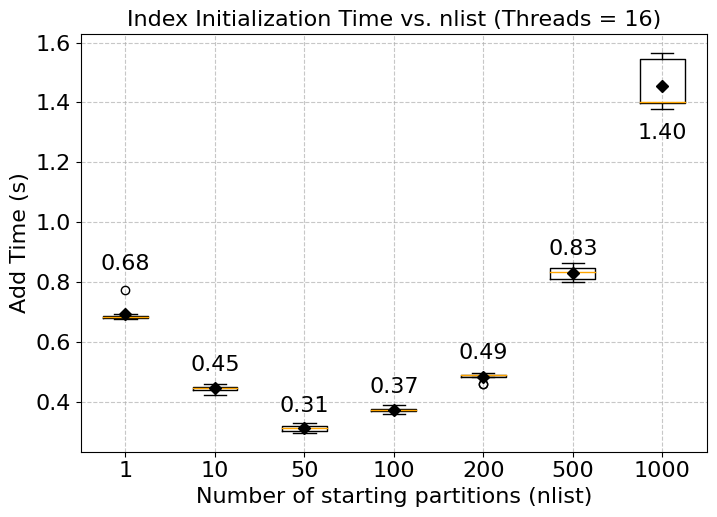

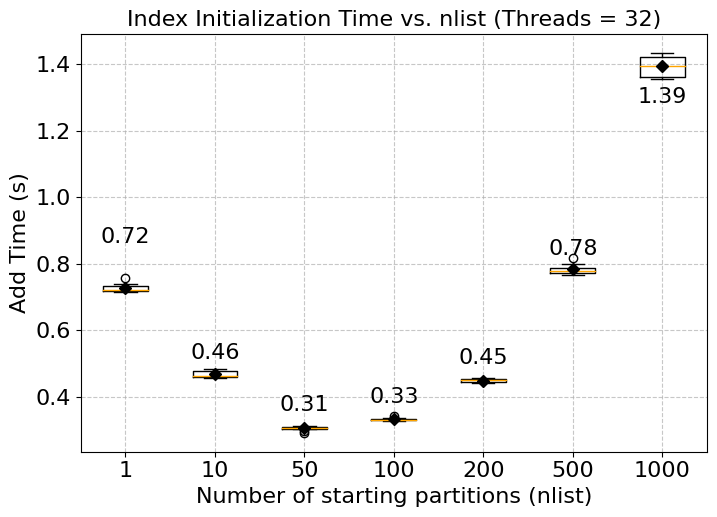

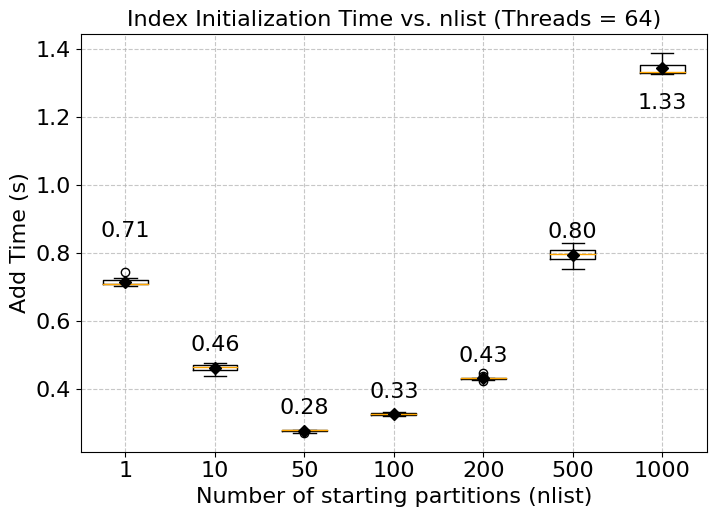

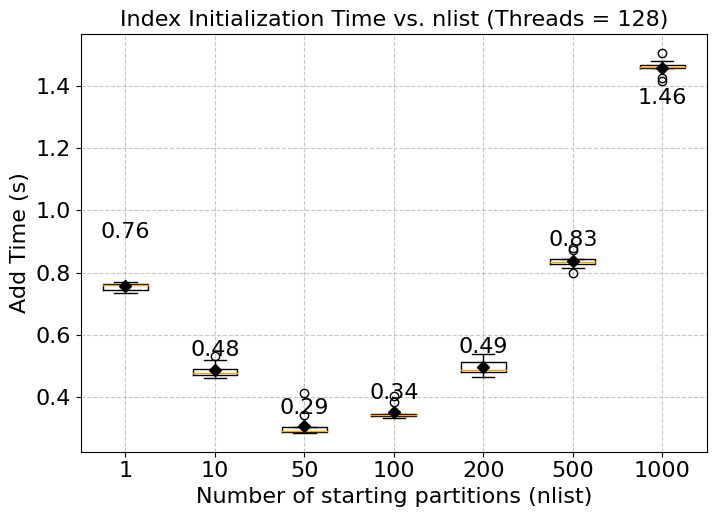

In [93]:
import matplotlib.pyplot as plt
lnwidth = 1

# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 1,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 7
fig_height = 5

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))

    nlist_labels = sorted(results[nthreads].keys())
    data = [results[nthreads][nlist] for nlist in nlist_labels]

    box = plt.boxplot(
        data,
        labels=nlist_labels,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
        boxprops=dict(linewidth=lnwidth),
        whiskerprops=dict(linewidth=lnwidth),
        capprops=dict(linewidth=lnwidth),
        medianprops=dict(linewidth=lnwidth, color="orange"),
    )
    # Add median labels: above all except the last (placed below)
    for i, line in enumerate(box['medians']):
        x, y = line.get_xdata(), line.get_ydata()
        median_y = y[0]
        y_range = plt.ylim()[1] - plt.ylim()[0]

        if i == len(box['medians']) - 1:
            # Place below for the last box
            y_offset = -0.05 * y_range
            va = 'top'
        elif i == 0:
            y_offset = +0.15 * y_range
            va = 'top'
        else:
            # Place above for all others
            y_offset = 0.03 * y_range
            va = 'bottom'

        plt.text(
            x.mean(), median_y + y_offset,
            f"{median_y:.2f}",
            ha='center', va=va,
            fontsize=16,
            color='black'
        )

    plt.xlabel("Number of starting partitions (nlist)")
    plt.ylabel("Add Time (s)")
    plt.title(f"Index Initialization Time vs. nlist (Threads = {nthreads})")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"boxplot_threads{nthreads}_niter-0.pdf", format="pdf", dpi=600)
    plt.show()


# Different Dataset:

In [3]:
xb, xq, gt, metric = load_dataset("SIFT10M")

Loading Dataset = SIFT10M


note, 3 runs here because it's way slower

In [6]:
# niter = 0 
# Parameters
nruns = 3
nthreads_list = [1, 2, 4, 8, 16, 32, 64, 128]
nlists = [1, 10, 50, 100, 200, 500, 1000]

# Store results as: results[nthreads][nlist] = [total_times]
results = {}

for nthreads in nthreads_list:
    faiss.omp_set_num_threads(nthreads)
    results[nthreads] = {}
    for nlist in nlists:
        total_times = []
        for run in range(nruns):
            _, train_time, add_time = train_ivfflat(
                xb,
                nlist=nlist,
                km_n_iter=0,
                km_max_pts=256,
                seed=42,
                store_dir=None,
                verbose=False,
                metric=metric,
            )
            total_time = train_time + add_time
            total_times.append(total_time)
            print(f"[threads={nthreads} | nlist={nlist} | run={run+1}] train={train_time:.4f}s, add={add_time:.4f}s, total={total_time:.4f}s")
        results[nthreads][nlist] = total_times

import pickle

with open("ivfflat_benchmark_results_SIFT10M_niter0.pkl", "wb") as f:
    pickle.dump(results, f)


[threads=1 | nlist=1 | run=1] train=1.0762s, add=6.9918s, total=8.0679s
[threads=1 | nlist=1 | run=2] train=1.0773s, add=6.7971s, total=7.8744s
[threads=1 | nlist=1 | run=3] train=1.0622s, add=7.1009s, total=8.1631s
[threads=1 | nlist=10 | run=1] train=1.0546s, add=5.0300s, total=6.0846s
[threads=1 | nlist=10 | run=2] train=1.0552s, add=6.2882s, total=7.3435s
[threads=1 | nlist=10 | run=3] train=1.0730s, add=4.6280s, total=5.7010s
[threads=1 | nlist=50 | run=1] train=1.0648s, add=6.5892s, total=7.6540s
[threads=1 | nlist=50 | run=2] train=1.0793s, add=6.5158s, total=7.5952s
[threads=1 | nlist=50 | run=3] train=1.0688s, add=6.4446s, total=7.5134s
[threads=1 | nlist=100 | run=1] train=1.0837s, add=7.9053s, total=8.9890s
[threads=1 | nlist=100 | run=2] train=1.0632s, add=8.0604s, total=9.1235s
[threads=1 | nlist=100 | run=3] train=1.0609s, add=8.1801s, total=9.2410s
[threads=1 | nlist=200 | run=1] train=1.0708s, add=11.3075s, total=12.3783s
[threads=1 | nlist=200 | run=2] train=1.0681s, a

KeyboardInterrupt: 

In [ ]:

import matplotlib.pyplot as plt
lnwidth = 1

# Set global plot style for paper-friendly visuals
plt.rcParams.update({
    "font.size": 1,
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "boxplot.meanprops.marker": "D",
    "boxplot.meanprops.markerfacecolor": "black",
    "boxplot.meanprops.markeredgecolor": "black",
})

fig_width = 7
fig_height = 5

for nthreads in nthreads_list:
    plt.figure(figsize=(fig_width, fig_height))

    nlist_labels = sorted(results[nthreads].keys())
    data = [results[nthreads][nlist] for nlist in nlist_labels]

    box = plt.boxplot(
        data,
        labels=nlist_labels,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
        boxprops=dict(linewidth=lnwidth),
        whiskerprops=dict(linewidth=lnwidth),
        capprops=dict(linewidth=lnwidth),
        medianprops=dict(linewidth=lnwidth, color="orange"),
    )
    # Add median labels: above all except the last (placed below)
    for i, line in enumerate(box['medians']):
        x, y = line.get_xdata(), line.get_ydata()
        median_y = y[0]
        y_range = plt.ylim()[1] - plt.ylim()[0]

        if i == len(box['medians']) - 1:
            # Place below for the last box
            y_offset = -0.05 * y_range
            va = 'top'
        elif i == 0:
            y_offset = +0.15 * y_range
            va = 'top'
        else:
            # Place above for all others
            y_offset = 0.03 * y_range
            va = 'bottom'

        plt.text(
            x.mean(), median_y + y_offset,
            f"{median_y:.2f}",
            ha='center', va=va,
            fontsize=16,
            color='black'
        )

    plt.xlabel("Number of starting partitions (nlist)")
    plt.ylabel("Add Time (s)")
    plt.title(f"Index Initialization Time vs. nlist (Threads = {nthreads})")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"boxplot_threads{nthreads}_niter-0.pdf", format="pdf", dpi=600)
    plt.show()
